
#	Trying Stuff
#	AUTHOR: 乔昂 - jueta
#	DATE: 13/12/2022


In [45]:

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_feather('data1.feather')
data.head()

,data,class
0,"[16.60377311706543, 17.106918334960938, 20.628...",Intermittent
1,"[2.51572322845459, -0.7547169923782349, 4.0251...",Dripping
2,"[4.276729583740234, -4.0251569747924805, 1.509...",Dripping
3,"[-2.7672955989837646, 4.0251569747924805, -1.0...",Dripping
4,"[1.7610063552856445, -6.5408806800842285, -4.0...",Dripping


In [44]:
dripping = data.loc[data['class'] == 'Dripping']

dripping_data = dripping['data']

dripping_data = dripping_data.to_numpy()

# dripping_data = np.asmatrix(dripping_data)

print(dripping_data.shape)

# ax = sns.heatmap(dripping_data, linewidth=0.5)
# plt.show()



(32,)


# Creating Statistical X classifications HEAT MAP


In [54]:
data_window = pd.read_feather('data_window1.feather')
data_window.head()

,name,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray mode.Sjaak,spray mode.Monica
0,setup/liquid/ethanol,"[16.60377311706543, 17.106918334960938, 20.628...",2.777800e-09,3001.54,-8.72663e-09,10,10,Mon_05 Dec 2022,3000,9.681536,29.664858,5.446546,9.056603,11.108419,Intermittent,no streamer onset
1,setup/liquid/ethanol,"[2.51572322845459, -0.7547169923782349, 4.0251...",2.777800e-09,3001.54,-8.72663e-09,10,10,Mon_05 Dec 2022,3000,1.308936,11.688127,3.418790,1.257862,3.660798,Dripping,no streamer onset
2,setup/liquid/ethanol,"[4.276729583740234, -4.0251569747924805, 1.509...",2.777800e-09,3051.29,-6.71951e-09,10,10,Mon_05 Dec 2022,3050,0.059411,11.729643,3.424857,0.000000,3.425372,Dripping,no streamer onset
3,setup/liquid/ethanol,"[-2.7672955989837646, 4.0251569747924805, -1.0...",2.777800e-09,3051.29,-6.71951e-09,10,10,Mon_05 Dec 2022,3050,0.275150,11.389175,3.374785,0.251572,3.385983,Dripping,no streamer onset
4,setup/liquid/ethanol,"[1.7610063552856445, -6.5408806800842285, -4.0...",2.777800e-09,3101.34,-5.84684e-09,10,10,Mon_05 Dec 2022,3100,0.277867,10.940171,3.307593,0.251572,3.319244,Dripping,no streamer onset


In [57]:
data_window.sort_values('spray mode.Sjaak',inplace=True, ascending=False)

print(data_window)

                     name                                          data [nA]  \
145  setup/liquid/ethanol  [104.90565490722656, 111.1949691772461, 106.66...   
20   setup/liquid/ethanol  [-1.5094339847564697, 0.25157231092453003, -4....   
14   setup/liquid/ethanol  [0.7547169923782349, 4.0251569747924805, -0.75...   
264  setup/liquid/ethanol  [139.11949157714844, 138.36477661132812, 145.1...   
147  setup/liquid/ethanol  [72.95597076416016, 67.42138671875, 76.2264099...   
..                    ...                                                ...   
139  setup/liquid/ethanol  [102.38993835449219, 97.10691833496094, 99.874...   
137  setup/liquid/ethanol  [102.89308166503906, 101.13207244873047, 107.6...   
136  setup/liquid/ethanol  [101.38365173339844, 104.15093994140625, 102.6...   
135  setup/liquid/ethanol  [101.13207244873047, 100.37735748291016, 101.6...   
132  setup/liquid/ethanol  [73.20755004882812, 77.23270416259766, 76.2264...   

     flow rate [m3/s]  voltage    curre

In [62]:

data_window = data_window.drop(['name', 'data [nA]','current PS', 'temperature', 'humidity', 'date and time', 'target voltage', 'spray mode.Monica'], axis=1)

data_window.columns


Index(['flow rate [m3/s]', 'voltage', 'mean', 'variance', 'deviation',
       'median', 'rms', 'spray mode.Sjaak'],
      dtype='object')

In [63]:
data_window.rename(columns = {'flow rate [m3/s]':'flow_rate', 'spray mode.Sjaak':'class'}, inplace = True)

data_window.columns


Index(['flow_rate', 'voltage', 'mean', 'variance', 'deviation', 'median',
       'rms', 'class'],
      dtype='object')

In [69]:
data_window = data_window.set_index('class')
data_window.head()

,flow_rate,voltage,mean,variance,deviation,median,rms
class,,,,,,,
Undefined,2.777800e-09,7001.59,73.113472,587.073181,24.229593,76.729561,77.023720
Undefined,2.777800e-09,3551.38,-0.051074,10.894595,3.300696,0.000000,3.301091
Undefined,2.777800e-09,3351.46,-0.036714,11.161729,3.340917,0.000000,3.341119
Undefined,2.777800e-09,10251.2,133.634415,2434.191650,49.337528,131.320755,142.451218
Undefined,2.777800e-09,7051.32,64.612312,585.541077,24.197956,62.641510,68.994873


In [85]:
data_window['voltage'] = data_window['voltage'].astype(float)
data_window.tail()

,flow_rate,voltage,mean,variance,deviation,median,rms
class,,,,,,,
Cone Jet,2.777800e-09,6801.27,100.745689,11.945660,3.456249,100.628929,100.804962
Cone Jet,2.777800e-09,6751.56,102.067581,12.449827,3.528431,102.138359,102.128555
Cone Jet,2.777800e-09,6751.56,102.685349,12.974382,3.601997,102.641510,102.748505
Cone Jet,2.777800e-09,6701.46,101.780952,15.005898,3.873745,101.635216,101.854645
Cone Jet,2.777800e-09,6651.43,89.394150,69.183197,8.317644,91.320755,89.780266


In [117]:
ConeJet_test = data_window.loc['Cone Jet']
ConeJet_test = ConeJet_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1).transpose()

MultiJet_test = data_window.loc['Multi Jet']
MultiJet_test = MultiJet_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1).transpose()

Intermittent_test = data_window.loc['Intermittent']
Intermittent_test = Intermittent_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1).transpose()

Undefined_test = data_window.loc['Undefined']
Undefined_test = Undefined_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1).transpose()

Dripping_test = data_window.loc['Dripping']
Dripping_test = Dripping_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1).transpose()

Corona_test = data_window.loc['Corona']
Corona_test = Corona_test.drop(['flow_rate', 'voltage', 'variance', 'deviation'], axis=1).transpose()

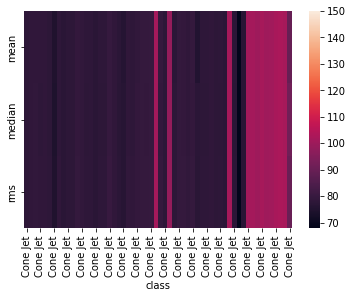

In [134]:
import seaborn as sns

ax = sns.heatmap(ConeJet_test, vmax=150)


<AxesSubplot:xlabel='class'>

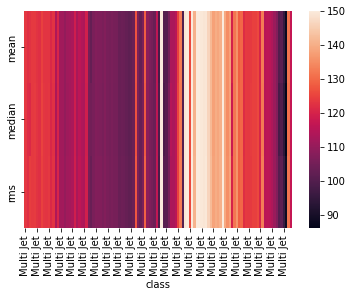

In [135]:
sns.heatmap(MultiJet_test, vmax=150)


<AxesSubplot:xlabel='class'>

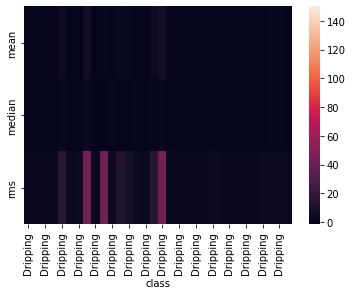

In [136]:
sns.heatmap(Dripping_test, vmax=150)

<AxesSubplot:xlabel='class'>

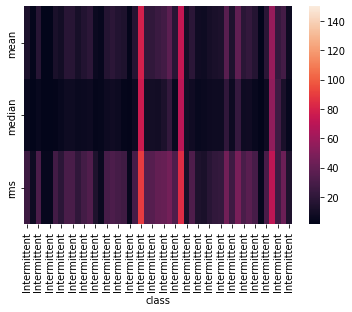

In [137]:
sns.heatmap(Intermittent_test, vmax=150)